In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
tf.compat.v1.disable_eager_execution()

In [3]:
learning_rate = 0.01
train_epochs = 1000

In [4]:
x_train = np.linspace(-1, 1, 101)
y_train = 2*x_train + np.random.randn(*x_train.shape)*0.33

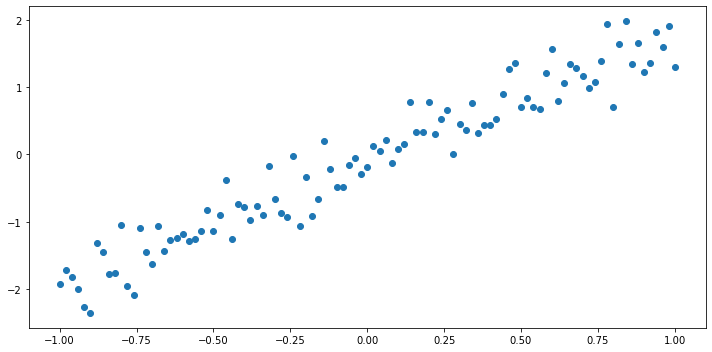

In [5]:
plt.figure(figsize= (10, 5))
plt.scatter(x_train, y_train)
plt.tight_layout()
plt.show()

In [6]:
X = tf.compat.v1.placeholder('float')
Y = tf.compat.v1.placeholder('float')

In [7]:
def model(x, w):
    return tf.multiply(x, w)

In [8]:
w = tf.Variable(0.0, name = 'weights')

In [9]:
y_model = model(X, w)

In [10]:
cost = tf.reduce_mean(tf.square(Y-y_model))

In [11]:
train_operation = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [12]:
sess = tf.compat.v1.Session()
init = tf.compat.v1.global_variables_initializer()
sess.run(init)

In [13]:
for epoch in range(train_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_operation, feed_dict = {X:x, Y:y})

In [14]:
w_val = sess.run(w)

In [15]:
sess.close()

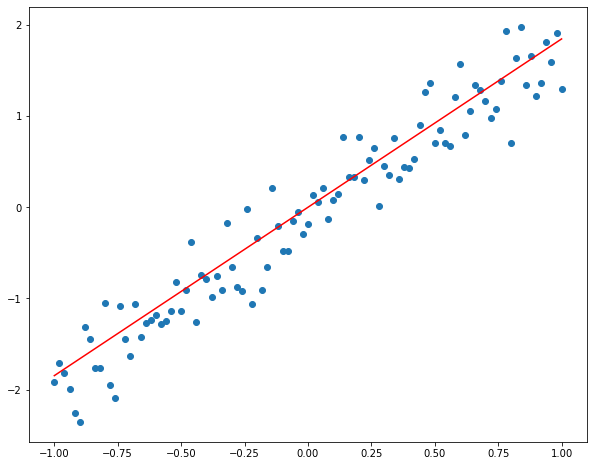

In [16]:
plt.figure(figsize = (10, 8))
plt.scatter(x_train, y_train)
y_learned = x_train * w_val
plt.plot(x_train, y_learned, 'r')
plt.show()

### Ploynomial Regression

In [17]:
trX = np.linspace(-1, 1, 101)

In [18]:
num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
trY = 0

In [19]:
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)
    

In [20]:
trY += np.random.randn(*trY.shape) * 1.5

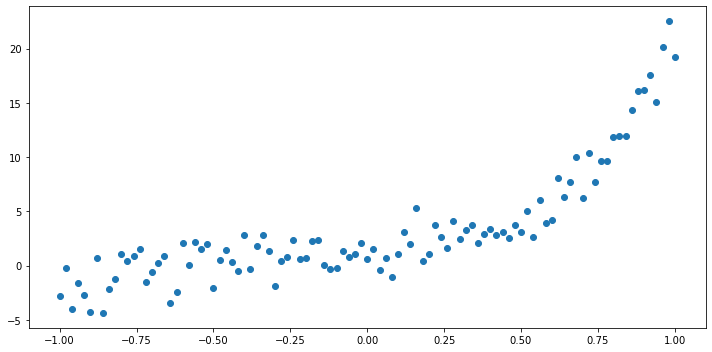

In [21]:
plt.figure(figsize = (10, 5))
plt.scatter(trX, trY)
plt.tight_layout()
plt.show()

In [22]:
X = tf.compat.v1.placeholder("float")
Y = tf.compat.v1.placeholder("float")

In [23]:
def model(x, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(x, i))
        terms.append(term)
    return tf.add_n(terms)

In [24]:
w = tf.Variable([0.] * num_coeffs, name = 'parameters')

In [25]:
y_model = model(X, w)

In [26]:
cost = tf.reduce_sum(tf.square(Y-y_model))

In [27]:
train_operation = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [28]:
sess  = tf.compat.v1.Session()
init = tf.compat.v1.global_variables_initializer()
sess.run(init)

In [29]:
for epoch in range(train_epochs):
    for (x, y) in zip (trX, trY):
        sess.run(train_operation, feed_dict = {X:x, Y:y})

In [30]:
w_val = sess.run(w)
print(w_val)

[1.2622817 1.8054146 3.2096343 6.382142  4.694957  4.0886126]


In [31]:
sess.close()

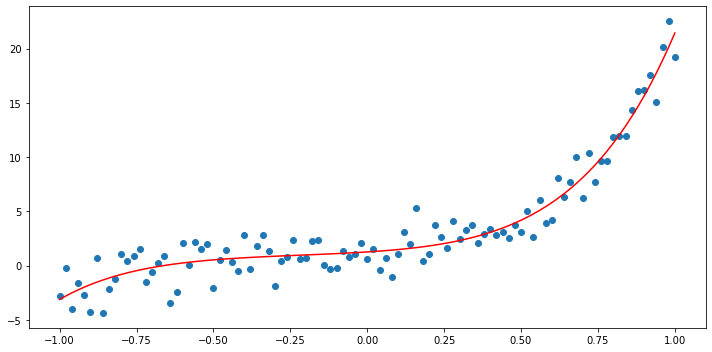

In [32]:
plt.figure(figsize = (10, 5))
plt.scatter(trX, trY)
trY2 = 0

for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX , i)
    
plt.plot(trX, trY2, 'r')
plt.tight_layout()
plt.show()